## **Step 1: Data Cleaning & Imputation**
<br>

> #### By: Siddharth Kulkarni

### Data Loading

In [2]:
library(readr)
library(dplyr)

data = read_csv("../input/covid19-dataset-for-year-2020/covid_data.csv")
head(data,5)


── Column specification ────────────────────────────────────────────────────────
cols(
  test_date = col_date(format = ""),
  cough = col_double(),
  fever = col_double(),
  sore_throat = col_double(),
  shortness_of_breath = col_double(),
  head_ache = col_double(),
  corona_result = col_character(),
  age_60_and_above = col_character(),
  gender = col_character(),
  test_indication = col_character()
)




test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
2020-11-12,0,0,0,0,0,negative,No,male,Other
2020-11-12,0,1,0,0,0,negative,No,male,Other
2020-11-12,0,0,0,0,0,negative,Yes,female,Other
2020-11-12,0,0,0,0,0,negative,No,male,Other
2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


> ***Looking at data we come to know that whole data is categorical except Date-Time***

### Converting all characters & Numeric data to categorical data

In [3]:
data = data%>%mutate(across(where(is.character),as.factor))
data = data%>%mutate(across(where(is.numeric),as.factor))
summary(data)

   test_date          cough       fever       sore_throat shortness_of_breath
 Min.   :2020-03-11   0:2631258   0:2645600   0:2712512   0:2731579          
 1st Qu.:2020-06-27   1: 111338   1:  96996   1:  30084   1:  11017          
 Median :2020-08-20                                                          
 Mean   :2020-08-07                                                          
 3rd Qu.:2020-09-25                                                          
 Max.   :2020-11-12                                                          
 head_ache    corona_result     age_60_and_above    gender       
 0:2682655   negative:2480403   No  :1908553     female:1371444  
 1:  59941   other   :  41218   Yes : 286399     male  :1278266  
             positive: 220975   NA's: 547644     NA's  :  92886  
                                                                 
                                                                 
                                                          

### Visualizing the Target Attribute

> *Target attribute: corona_result*

In [5]:
library(repr) 
options(repr.plot.width=20, repr.plot.height=10)

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
negative,2480403,90.44,90.44
positive,220975,8.06,98.50
other,41218,1.50,100.00


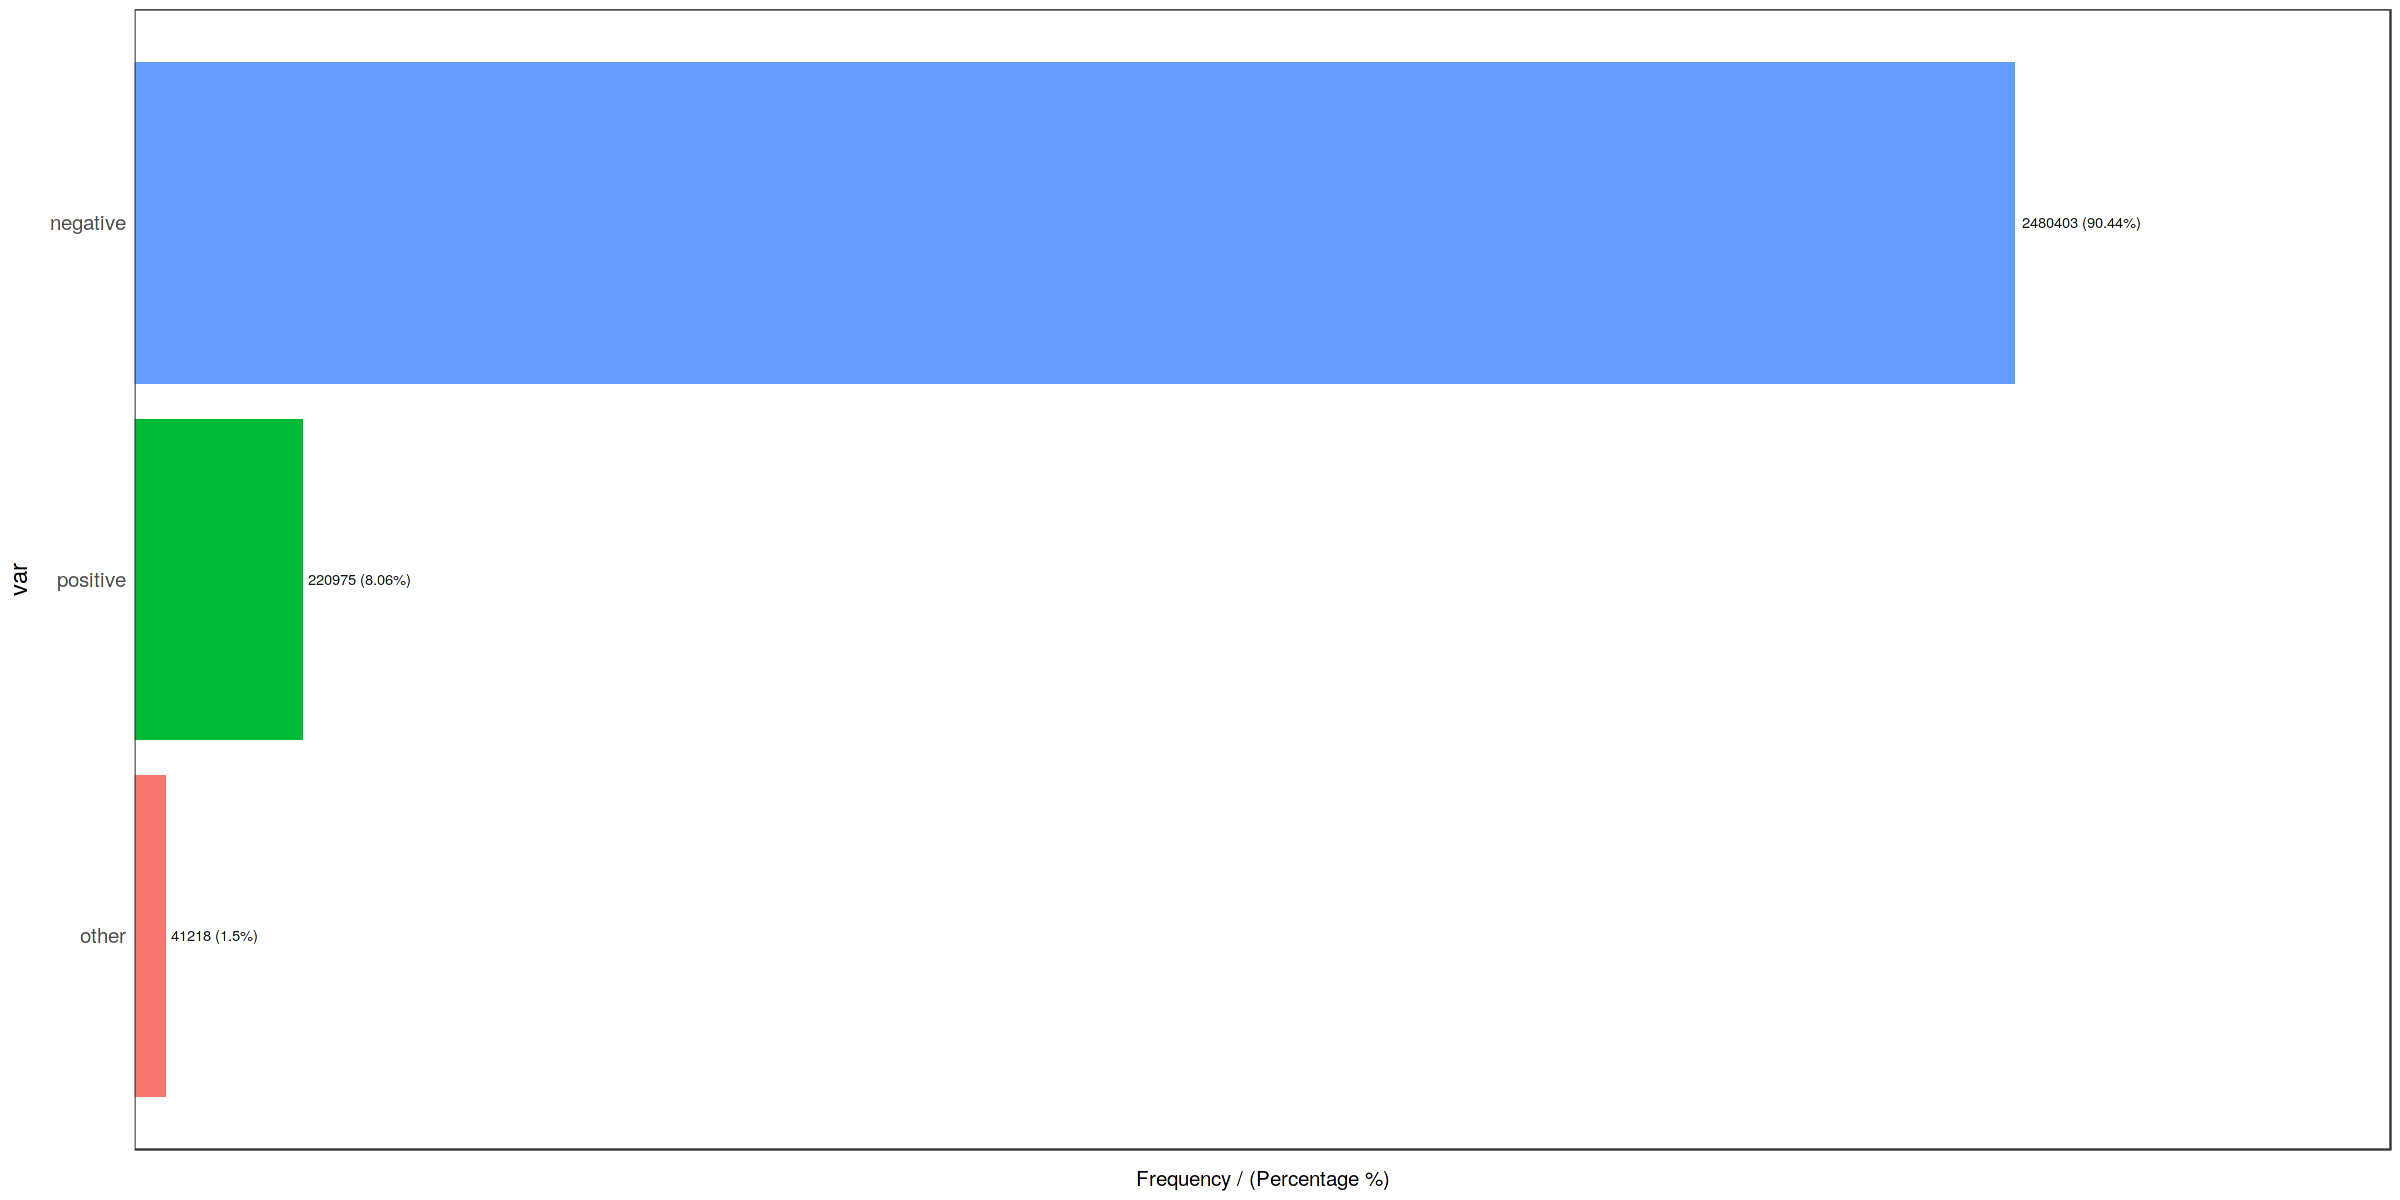

In [7]:
library(funModeling)
options(warn=-1)

freq(data$corona_result)

> ***We observe more than 90% of values are negative in target column***

> ***Dataset is biased***

### Analysing The missing Values

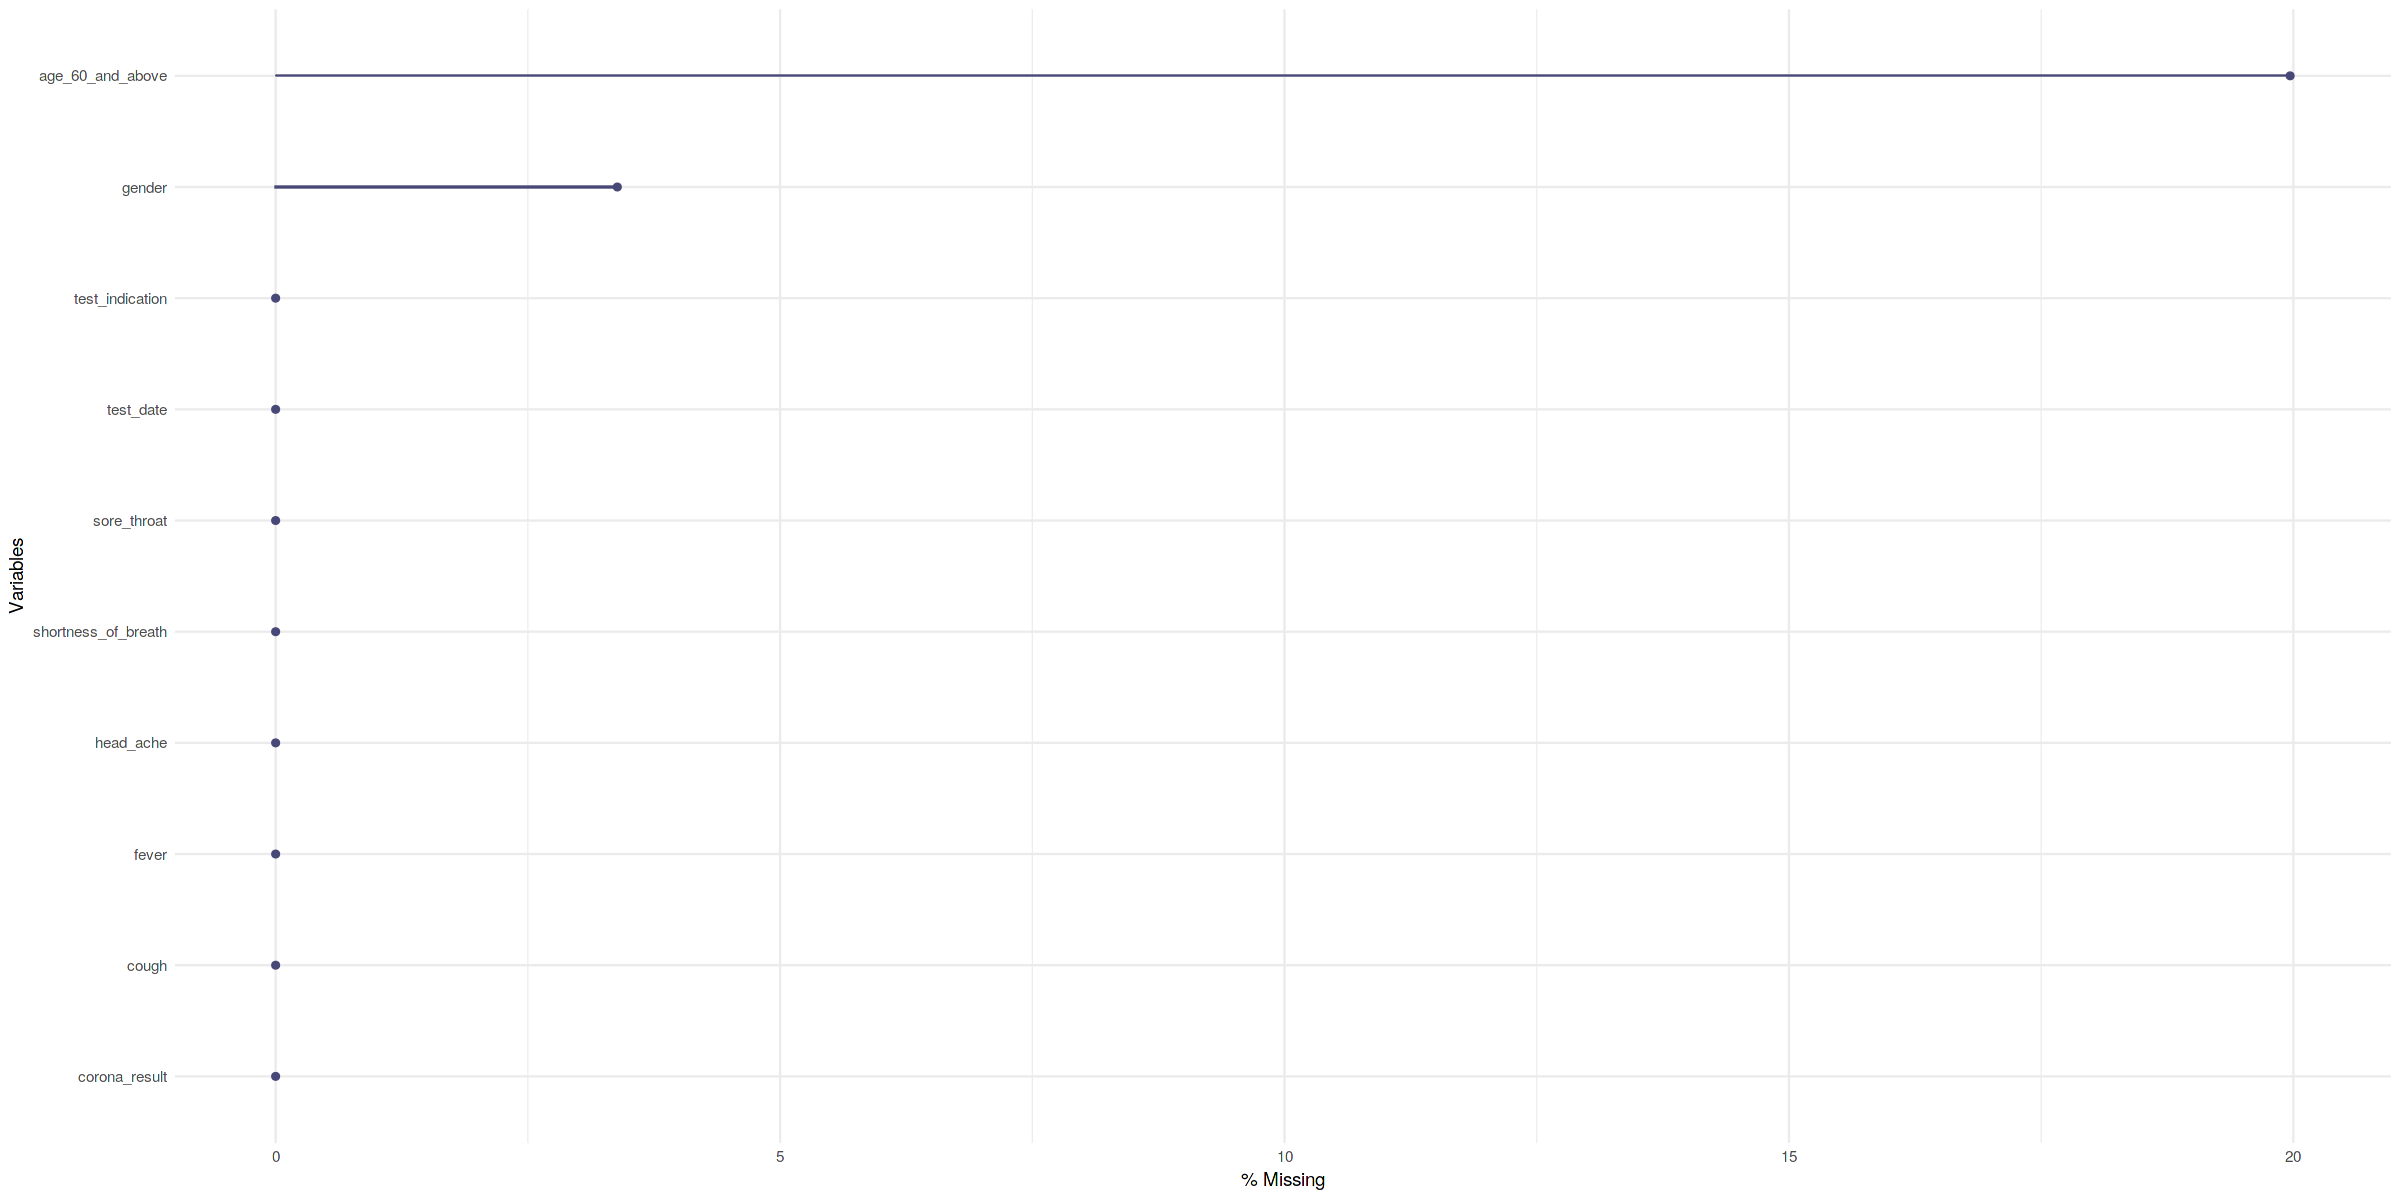

In [8]:
library(ggplot2)
library(naniar)

gg_miss_var(data, show_pct = TRUE)


 Variables sorted by number of missings: 
            Variable      Count
    age_60_and_above 0.19968089
              gender 0.03386791
           test_date 0.00000000
               cough 0.00000000
               fever 0.00000000
         sore_throat 0.00000000
 shortness_of_breath 0.00000000
           head_ache 0.00000000
       corona_result 0.00000000
     test_indication 0.00000000


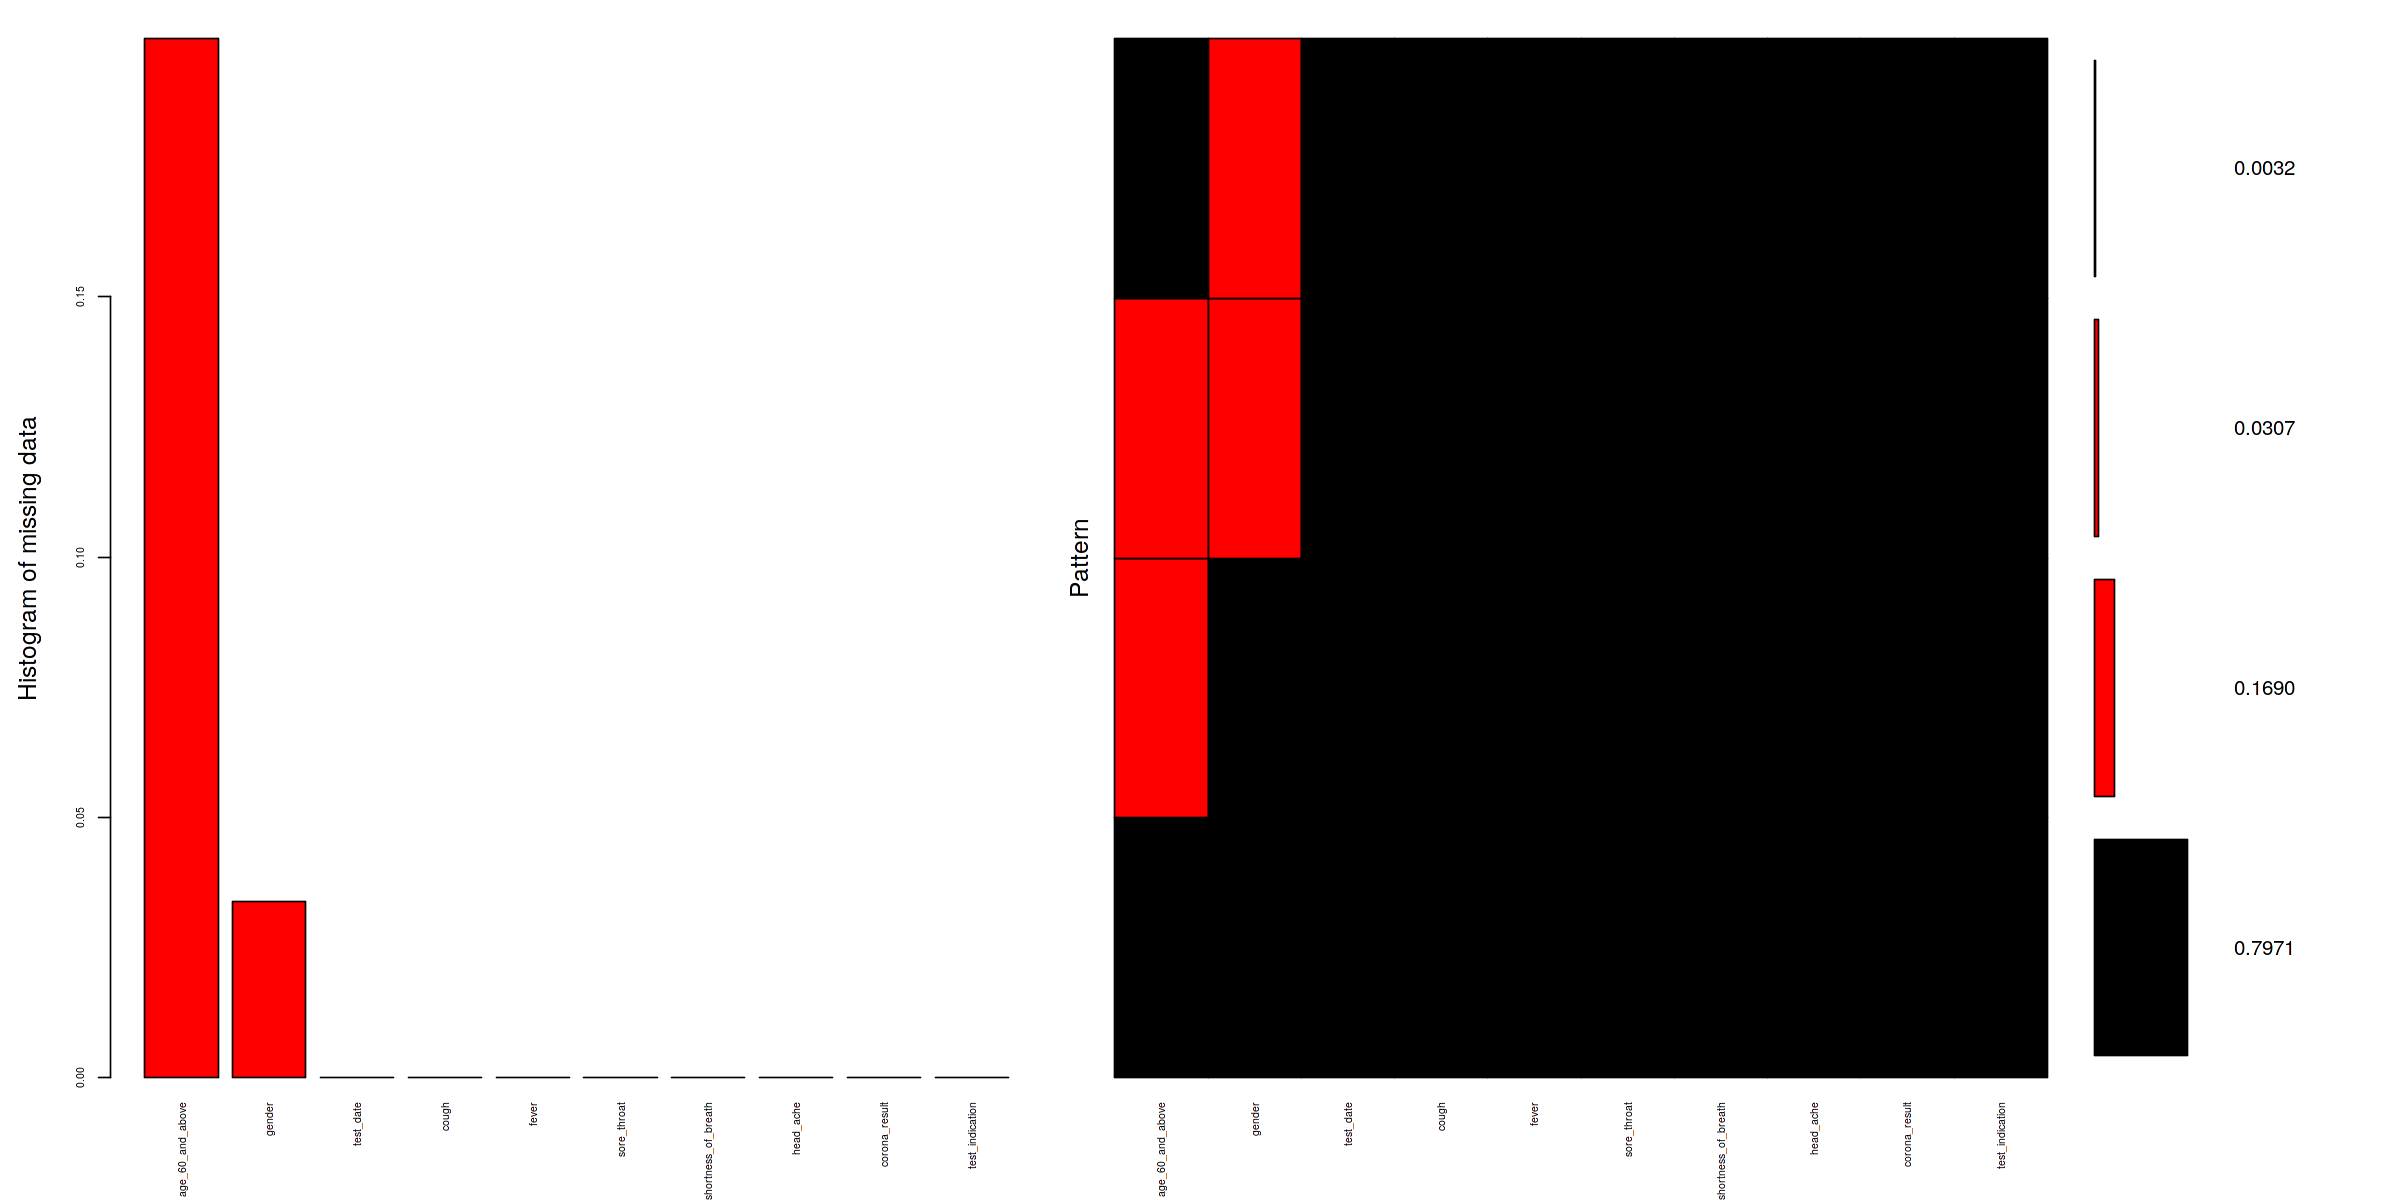

In [11]:
library(VIM)

x1 = c("test_date","cough","fever","sore_throat","shortness_of_breath","head_ache","corona_result","age_60_and_above","gender","test_indication")
aggr(data, col=c('black','red'), numbers=TRUE, sortVars=TRUE, labels=x1, cex.axis=.5, gap=3, ylab=c("Histogram of missing data","Pattern"))

> ***We observe that age_60_and_above and gender are only columns with missing values***

### Imputing the missing values using MICE Imputer

In [14]:
library(mice)

tempData = mice(data,m=3,maxit=2,meth='logreg',seed=500)
head(tempData$imp$gender)


 iter imp variable
  1   1  age_60_and_above  gender
  1   2  age_60_and_above  gender
  1   3  age_60_and_above  gender
  2   1  age_60_and_above  gender
  2   2  age_60_and_above  gender
  2   3  age_60_and_above  gender


,1,2,3
,<fct>,<fct>,<fct>
6798,female,male,female
6799,male,female,male
6934,female,male,female
7310,female,male,female
7311,male,female,female
7312,female,female,female


> ***We Choose 3rd Dataset as our imputed dataset***

In [15]:
data1 = complete(tempData,3)
summary(data1)

   test_date          cough       fever       sore_throat shortness_of_breath
 Min.   :2020-03-11   0:2631258   0:2645600   0:2712512   0:2731579          
 1st Qu.:2020-06-27   1: 111338   1:  96996   1:  30084   1:  11017          
 Median :2020-08-20                                                          
 Mean   :2020-08-07                                                          
 3rd Qu.:2020-09-25                                                          
 Max.   :2020-11-12                                                          
 head_ache    corona_result     age_60_and_above    gender       
 0:2682655   negative:2480403   No :2381003      female:1420100  
 1:  59941   other   :  41218   Yes: 361593      male  :1322496  
             positive: 220975                                    
                                                                 
                                                                 
                                                          

### Eliminating rows where corona result = others.

In [16]:
data1$corona_result = as.character(data1$corona_result)
data1$corona_result[data1$corona_result == "other"] = NA
data1$corona_result = as.factor(data1$corona_result)

data = na.omit(data1)
summary(data)

   test_date          cough       fever       sore_throat shortness_of_breath
 Min.   :2020-03-11   0:2591816   0:2606013   0:2671842   0:2690574          
 1st Qu.:2020-06-26   1: 109562   1:  95365   1:  29536   1:  10804          
 Median :2020-08-19                                                          
 Mean   :2020-08-07                                                          
 3rd Qu.:2020-09-25                                                          
 Max.   :2020-11-12                                                          
 head_ache    corona_result     age_60_and_above    gender       
 0:2642548   negative:2480403   No :2344711      female:1399063  
 1:  58830   positive: 220975   Yes: 356667      male  :1302315  
                                                                 
                                                                 
                                                                 
                                                          

### Output CSV

In [17]:
write.csv(data,"./imputed_data.csv",row.names=FALSE)

### Conclusions

> 1. *All Features in the Dataset are Categorical except Date-Time*
> 2. *Target feature is biased and has more than 90% of Negative cases.*
> 3. *Age & Gender feature has missing values and is imputed using MICE imputer with "logreg" (Logistic Regression) function.*
> 4. *Row sampling. (Deleting rows where corona_result = other)*